In [21]:
import pandas as pd
#import requests 
#from io import StringIO
#from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import geopandas as gpd
#from shapely import ops
from shapely import geometry as geom
import os
import urllib
#from sjoin import sjoin
%matplotlib inline

### 1. Get map data for Queens

In [10]:
# map data for NYC
zipgeojson = "https://github.com/YuHuaCheng/Map/raw/master/data/nyc-zip-code-tabulation-areas-polygons.geojson"

# save the NYC map data under "data" folder
zipsfile = os.path.join("data",zipgeojson.split("/")[-1])

# read the saved NYC map data file
try:
    NZ = gpd.read_file(zipsfile) # NYC map data with Zipcode
except OSError as e:
    urllib.request.urlretrieve(zipgeojson, zipsfile)
    
    #zips geojson had a var assignment that caused problems
    fin      = open(zipsfile)
    
    lines    = [line for line in fin]
    lines[0] = lines[0].replace("var nycdata = ", "")
    
    fin.close()
    
    fout = open(zipsfile, "w")
    for line in lines:
        fout.write(line)
    fout.flush()
    fout.close()
    
    NZ = gpd.read_file(zipsfile)
    
NZ.shape # NYC is composed of 262 subarea on the map data

(262, 12)

In [11]:
# NYC map data with Zipcode
NZ.head(3)

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040


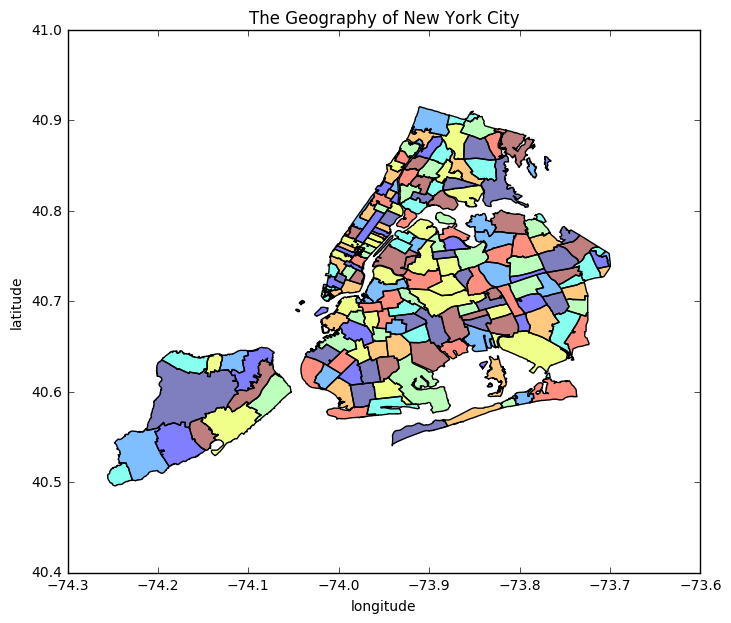

In [12]:
# draw the map data for New York City
NZ.plot(figsize=(14,7))
plt.title("The Geography of New York City")
plt.xlabel("longitude")
plt.ylabel("latitude")

In [13]:
# seperate Queens map data from NYC map data
QN = NZ[NZ.borough=='Queens']
QN = QN.reset_index()

In [6]:
QN.head(3)

,index,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040


In [14]:
# number of different zipcodes in Queens
#print("number of zip codes in Queens: ", QN.postalCode.unique().shape[0]) # 67

# number of shape areas in QN data
print("number of shape areas in Queens: ", QN.Shape_Area.unique().shape[0]) # 70

number of shape areas in Queens:  70


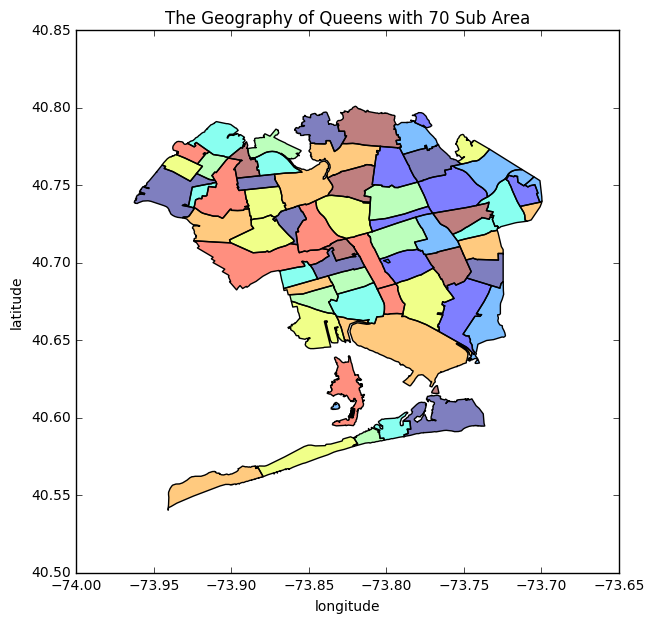

In [15]:
# draw Queens
QN.plot(figsize=(14,7))
plt.title("The Geography of Queens with 70 Sub Area") # <~~~~~~~~~~~~~~ editted it for each shape doesn't mean zip
plt.xlabel("longitude")
plt.ylabel("latitude")

### 2. Apply taxi data into Queens map data
**1) Read preprocessed taxi dataset.**

In [43]:
# read stored csv files
taxi_data_10 = pd.read_csv("taxi_data_csv_files/taxi_data_10.csv")
taxi_data_11 = pd.read_csv("taxi_data_csv_files/taxi_data_11.csv")
taxi_data_12 = pd.read_csv("taxi_data_csv_files/taxi_data_12.csv")
taxi_data_13 = pd.read_csv("taxi_data_csv_files/taxi_data_13.csv")
taxi_data_14 = pd.read_csv("taxi_data_csv_files/taxi_data_14.csv")

**2) Process taxi data to make it applicable to map data.**

In [44]:
# take pickup latitude and longitude pairs from taxi data, and transform the pair into points 
def cov_latlon_POINT(dataframe): 
    pickup_latlon = []
    for i in range (len(dataframe)):
        pickup_latlon.append(geom.Point(dataframe.pickup_longitude.iloc[i],
                                        dataframe.pickup_latitude.iloc[i]))
    PickupP_df      = gpd.GeoSeries(pickup_latlon)
    PickupP_df      = PickupP_df[PickupP_df.values != 'POINT (0.0 0.0)'] #get rid of 0.0 0.0 lon-lat points
    GeoPickup_Point = gpd.GeoDataFrame(geometry=PickupP_df)
    return (GeoPickup_Point)

In [51]:
# get pickup points for each years

# 2010 pickup points
GeoPickup10 = cov_latlon_POINT(taxi_data_10)
print("2010 pickup points: ", GeoPickup10.shape)
print(GeoPickup10.head(2))
print()

# 2011 pickup points
GeoPickup11 = cov_latlon_POINT(taxi_data_11)
print("2011 pickup points: ", GeoPickup11.shape)
print(GeoPickup11.head(2))
print()

# 2012 pickup points
GeoPickup12 = cov_latlon_POINT(taxi_data_12)
print("2012 pickup points: ", GeoPickup12.shape)
print(GeoPickup12.head(2))
print()

# 2013 pickup points
GeoPickup13 = cov_latlon_POINT(taxi_data_13)
print("2013 pickup points: ", GeoPickup13.shape)
print(GeoPickup13.head(2))
print()

# 2014 pickup points
GeoPickup14 = cov_latlon_POINT(taxi_data_14)
print("2014 pickup points: ", GeoPickup14.shape)
print(GeoPickup14.head(2))

2010 pickup points:  (100000, 1)
                       geometry
0  POINT (-73.973838 40.759252)
1   POINT (-73.96821 40.770695)

2011 pickup points:  (100000, 1)
                               geometry
0  POINT (-73.98677499999999 40.725802)
1          POINT (-73.993387 40.721605)

2012 pickup points:  (100000, 1)
                               geometry
0  POINT (-73.89217499999999 40.746992)
1          POINT (-73.782115 40.644622)

2013 pickup points:  (100000, 1)
                      geometry
0   POINT (-73.994935 40.7348)
1  POINT (-73.972595 40.76223)

2014 pickup points:  (100000, 1)
                               geometry
0  POINT (-73.97773000000001 40.752252)
1          POINT (-73.981925 40.765817)


** 3) Apply the pickup points into Queens map. **

In [52]:
# take point data and map data, and return a list of the point lists within the geometry of the map data
def points_in_region(points, region): # <~~~~~~~~~~~~~~ editted it from "City_only_Points(GeoP)"
    within_region = []
    for i in range(len(region)):
        point_in_sub_area = points[points.geometry.within(region.geometry[i])]
        within_region.append(point_in_sub_area) 
    return(within_region)

In [53]:
# get pickup points in Queens for each year
pickup_in_QN10 = points_in_region(GeoPickup10, QN)
pickup_in_QN11 = points_in_region(GeoPickup11, QN)
pickup_in_QN12 = points_in_region(GeoPickup12, QN)
pickup_in_QN13 = points_in_region(GeoPickup13, QN)
pickup_in_QN14 = points_in_region(GeoPickup14, QN)

In [57]:
def get_pickup_sum(geo_points):
    sum_  = 0
    for i in range (len(geo_points)):
        sum_ = sum_ + len(geo_points[i])
    return sum_

In [60]:
# report the number of taxi pickups in Queens
sum_pickup10 = get_pickup_sum(pickup_in_QN10)
sum_pickup11 = get_pickup_sum(pickup_in_QN11)
sum_pickup12 = get_pickup_sum(pickup_in_QN12)
sum_pickup13 = get_pickup_sum(pickup_in_QN13)
sum_pickup14 = get_pickup_sum(pickup_in_QN14)

# report
#print("Taxi pickups in Queens out of 100,000 taxi trips in NYC for Year 2010: ",  sum_pickup10)
#print("Taxi pickups in Queens out of 100,000 taxi trips in NYC for Year 2011: ",  sum_pickup11)
#print("Taxi pickups in Queens out of 100,000 taxi trips in NYC for Year 2012: ",  sum_pickup12)
#print("Taxi pickups in Queens out of 100,000 taxi trips in NYC for Year 2013: ",  sum_pickup13)
#print("Taxi pickups in Queens out of 100,000 taxi trips in NYC for Year 2014: ",  sum_pickup14)

Taxi pickups in Queens out of 100,000 taxi trips in NYC for Year 2010:  5184
Taxi pickups in Queens out of 100,000 taxi trips in NYC for Year 2011:  5425
Taxi pickups in Queens out of 100,000 taxi trips in NYC for Year 2012:  5156
Taxi pickups in Queens out of 100,000 taxi trips in NYC for Year 2013:  6927
Taxi pickups in Queens out of 100,000 taxi trips in NYC for Year 2014:  7225


In [88]:
####################################################################### need a graph for sum_pickup14 =>

In [89]:
####################################################################### visualize flushing pickups 

In [74]:
# sort the pickup points for each subarea in Queens based on zip code
def sort_points(points):
    points_per_zipcode = {}
    for i in range(len(points)):
        points_per_zipcode[i] = len(points[i])
    return points_per_zipcode

In [75]:
# sort pickup points for each year
pickup_per_zipcode10 = sort_points(pickup_in_QN10)
pickup_per_zipcode11 = sort_points(pickup_in_QN11)
pickup_per_zipcode12 = sort_points(pickup_in_QN12)
pickup_per_zipcode13 = sort_points(pickup_in_QN13)
pickup_per_zipcode14 = sort_points(pickup_in_QN14)

In [84]:
# make a dataframe for pickup points per zip code in Queens
QN_per_Zip_df10 = pd.DataFrame.from_dict(pickup_per_zipcode10, orient='index')
QN_per_Zip_df10.rename(columns={0: 'pickups'}, inplace = True)
QN_per_Zip_df10['ZIP'] = QN.postalCode.values
QN_per_Zip_df10.head()

,pickups,ZIP
0,21,11372
1,0,11004
2,1,11040
3,1,11426
4,7,11365


In [85]:
# sort the pickup data in decending order based on number of pickups
max_trip = QN_per_Zip_df10.sort_values('pickups', ascending = False)
max_trip.head()

,pickups,ZIP
31,2022,11371
60,1543,11430
45,407,11101
41,191,11106
43,173,11377


In [87]:
# flushing pickups
max_val = max_trip.reset_index()
print ("The max trips made per Zip-Code is: ", max_val.loc[0]['pickups'])
print ("The ZipCode that it Corresponds to is: ", max_val.loc[0].ZIP)

The max trips made per Zip-Code is:  2022
The ZipCode that it Corresponds to is:  11371


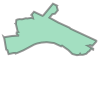

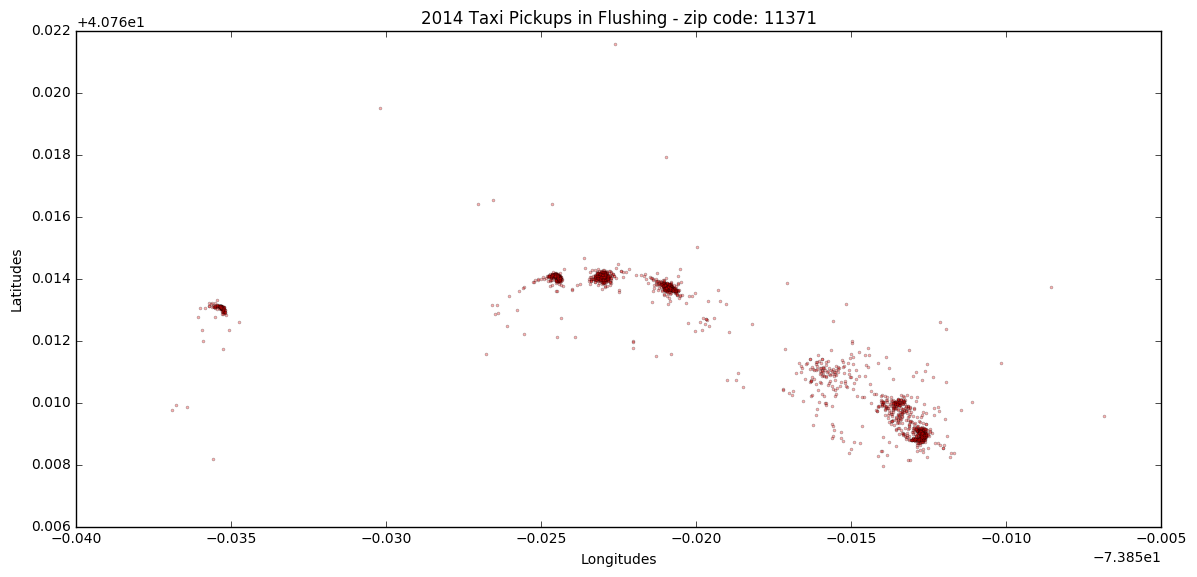

In [70]:
# visualize flushing pickups 
Plot_11371 = GeoPickup[GeoPickup.geometry.within(QN.geometry[31])]
QN.geometry[31]
Plot_11371.plot(marker='o', color='red', alpha=0.3, markersize=2, figsize=(14,7))
plt.title("2014 Taxi Pickups in " + QN.PO_NAME.iloc[31] + " - zip code: " + str(QN.postalCode.iloc[31]))
plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
QN.geometry[31]

will repeat "2.2) and 2.3)"  with the rest dataset; 2013, 2012, 2011, 2010 